In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/artists-final/artists-data-2.csv
/kaggle/input/artist-vineet/artist_data_vineet.csv


In [2]:
# Read the DataFrame from the CSV file
df = pd.read_csv('/kaggle/input/artists-final/artists-data-2.csv')
df

,name,gharana,guru,speciality
0,A T Kanan,Kirana,Girija Shankar Chakrabarty,Vocal
1,Aarshin Karande,Mewati,"Amit Kavthekar, Sandeep Ranade",Vocal
2,Aashish Khan,Senia,"Annapurna Devi, Ali Akbar Khan",Sarod
3,Abbas Ali Khan,Patiala,Fateh Ali Khan,Vocal
4,Abdul Halim Jaffer Khan,Jafferkhani,NaN,Sitar
...,...,...,...,...
843,Zia Fariduddin Dagar,Dagur Bani,"Ziauddin Khan Dagar, Zia Mohiuddin Dagar",Vocal
844,Zia Mohiuddin Dagar,Dagur Bani,Ziauddin Khan Dagar,Rudra Veena or Been
845,Ziauddin Khan Dagar,Dagur Bani,Zakiruddin Khan Dagar,Vocal
846,Zohra Bai,Agra,NaN,Vocal


In [3]:
import pandas as pd

# Assuming your DataFrame is named df

# Splitting the 'guru' column into multiple columns
df_gurus = df['guru'].str.split(',', expand=True)

# Adding a prefix to the column names for clarity
df_gurus.columns = [f'guru{i+1}' for i in range(len(df_gurus.columns))]

# Concatenating the new columns with the original DataFrame
df_concat = pd.concat([df, df_gurus], axis=1)

# Dropping the original 'guru' column
# df_concat.drop(columns=['guru'], inplace=True)

# Reordering the columns
df_reordered = df_concat[['name', 'gharana', 'speciality'] + [col for col in df_gurus.columns]]

# Displaying the result
df_reordered


,name,gharana,speciality,guru1,guru2,guru3,guru4,guru5,guru6
0,A T Kanan,Kirana,Vocal,Girija Shankar Chakrabarty,None,None,None,None,None
1,Aarshin Karande,Mewati,Vocal,Amit Kavthekar,Sandeep Ranade,None,None,None,None
2,Aashish Khan,Senia,Sarod,Annapurna Devi,Ali Akbar Khan,None,None,None,None
3,Abbas Ali Khan,Patiala,Vocal,Fateh Ali Khan,None,None,None,None,None
4,Abdul Halim Jaffer Khan,Jafferkhani,Sitar,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
843,Zia Fariduddin Dagar,Dagur Bani,Vocal,Ziauddin Khan Dagar,Zia Mohiuddin Dagar,None,None,None,None
844,Zia Mohiuddin Dagar,Dagur Bani,Rudra Veena or Been,Ziauddin Khan Dagar,None,None,None,None,None
845,Ziauddin Khan Dagar,Dagur Bani,Vocal,Zakiruddin Khan Dagar,None,None,None,None,None
846,Zohra Bai,Agra,Vocal,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
merged_df=df_reordered
# Check if all guru columns are filled
mask = df_reordered[['guru1', 'guru2', 'guru3', 'guru4', 'guru5']].notnull().all(axis=1)

# Print the rows where all guru columns are filled
df_reordered[mask]


,name,gharana,speciality,guru1,guru2,guru3,guru4,guru5,guru6
26,Akhil Jobanputra,Mewati,Vocal,Amit Arya,Sanjeev Abhyankar,Pandit Jasraj,Asha Lohia,Arijit Mahalanabis,Arun Dravid
496,Padma Talwalar,Jaipur-Atrauli,Vocal,Nivruttibua Sarnaik,Gangadhar Pimpalkhare,Mogubai Kurdikar,Kishori Amonkar,Gajanan Anant Joshi,None
572,Ram Marathe,Gwalior,Vocal,Manahar Barve,Jagannathbua Purohit 'Gunidas',Krishnarao Phulambrikar 'Krishnadas',Mirashibua,Vilayat Hussain Khan 'Pran Piya',None
759,Tanveer Ahmed Khan,Delhi,Vocal,Iqbal Ahmad Khan,Nasir Ahmed Khan,Zafar Ahmed Khan,Zahoor Ahmed Khan,Hilal Amhed Khan,None
784,Varada Godbole,Kirana,Vocal,Yashwant Mahale,Achyut Keshav Abhyankar,Sushila Pohankar,Madhukar Joshi,Ajay Pohankar,None


In [5]:
# Create a set of all names
names_set = set(merged_df['name'])

# Initialize a list to store gurus not in name column
gurus_not_in_name = []

# Iterate over the rows of the DataFrame
for _, row in merged_df.iterrows():
    for i in range(1, 7):  # Assuming you have guru1 to guru6 columns
        guru = row[f'guru{i}']
        if guru not in names_set and not pd.isnull(guru):
            gurus_not_in_name.append(guru)

# Print the gurus not in name column
# Iterate over the list of gurus not in the name column
for guru in gurus_not_in_name:
    # Find the corresponding row where guru exists
    row_with_guru = merged_df[merged_df.eq(guru).any(axis=1)].iloc[0]

    # Extract information from the corresponding row
    gharana = row_with_guru['gharana']
    speciality = row_with_guru['speciality']

    # Create a DataFrame with values for each column
    new_row = pd.DataFrame({'name': [guru], 'gharana': [gharana], 'speciality': [speciality]})

    # Concatenate the new row DataFrame to the original DataFrame
    merged_df = pd.concat([merged_df, new_row], ignore_index=True)

# Print the updated DataFrame
merged_df


,name,gharana,speciality,guru1,guru2,guru3,guru4,guru5,guru6
0,A T Kanan,Kirana,Vocal,Girija Shankar Chakrabarty,None,None,None,None,None
1,Aarshin Karande,Mewati,Vocal,Amit Kavthekar,Sandeep Ranade,None,None,None,None
2,Aashish Khan,Senia,Sarod,Annapurna Devi,Ali Akbar Khan,None,None,None,None
3,Abbas Ali Khan,Patiala,Vocal,Fateh Ali Khan,None,None,None,None,None
4,Abdul Halim Jaffer Khan,Jafferkhani,Sitar,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1111,Ustad Zia Mohiuddin Dagar,Dagar Gharana,Dhrupad Vocal,NaN,NaN,NaN,NaN,NaN,NaN
1112,Krishna Gundopant Ginde,Agra,Vocal,NaN,NaN,NaN,NaN,NaN,NaN
1113,Srikrishna Narayan Ratanjankar 'Sujaan',Agra,Vocal,NaN,NaN,NaN,NaN,NaN,NaN
1114,Dinkar Kaikini 'Din Rang',Agra,Vocal,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go

# Assuming df is your DataFrame containing the data
# Read your DataFrame

# Create an empty undirected graph
G = nx.Graph()

# Add nodes for both 'guru' and 'name'
for _, row in merged_df.iterrows():
    for i in range(1, 7):
        guru = row[f'guru{i}']
        name = row['name']
        if not pd.isnull(guru):
            G.add_node(guru)
        if not pd.isnull(name):
            G.add_node(name)
        if not pd.isnull(guru) and not pd.isnull(name):
                G.add_edge(guru, name)
                G.add_edge(name, guru)

# Create positions for the nodes
pos = nx.spring_layout(G)

# Create node trace
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    text=list(G.nodes()),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10,
        line_width=2
    )
)

# Create edge trace using the same node positions
edge_trace = go.Scatter(
    x=[pos[edge[0]][0] for edge in G.edges()],
    y=[pos[edge[0]][1] for edge in G.edges()],
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create figure
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Graph of Guru and Name Relationships',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='white'  # Change background color to white
    )
)

# Add zoom, pan, and reset buttons
fig.update_layout(
    xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks='',
        showticklabels=False
    ),
    autosize=False,
    hovermode='closest',
    showlegend=False,
    width=800,
    height=600,
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Zoom", method="animate"),
                dict(label="Pan", method="animate"),
                dict(label="Reset", method="animate")
            ],
            direction="left",
            pad={"r": 10, "t": 10},
            showactive=False,
            x=0.01,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show plot
fig.show()
# Save the plot as an HTML file
fig.write_html("graph.html")


In [11]:
connected_components = list(nx.connected_components(G))
num_components = len(connected_components)

# Create a map to get the connected component ID when passing in a name
name_to_component_id = {}
for i, component in enumerate(connected_components):
    for name in component:
        name_to_component_id[name] = i
        
        

# Print the number of disjoint components and the name-to-component ID map
print("Number of disjoint components:", num_components)
print("Name-to-component ID map:", name_to_component_id)

Number of disjoint components: 257
Name-to-component ID map: {'Shashikala Gurav Kulhalli': 0, 'Rahul Sharma': 0, 'Sameehan Kashalkar': 0, 'Hirabai Barodekar': 0, 'Girija Shankar Chakrabarty': 0, 'Balakrishnabua Ichalkaranjikar': 0, 'D. R. Nimbargi': 0, 'Bhimsen Joshi': 0, 'Mukul Shivputra Komkali': 0, 'Tarabai Mane': 0, 'Ashwini Gokhale': 0, 'Hussain Sayeeduddin Dagar': 0, 'Adwait Joshi': 0, 'Vikas Kashalkar': 0, 'Vasudeo Joshi': 0, "Saudagar Nagnath Gore 'Chhota Gandharva'": 0, 'Naina Devi': 0, 'Tejendra Narayan Majumdar': 0, 'Mukundrao Gokhale': 0, 'A T Kanan': 0, ' Natthan Khan': 0, ' Neelakanthabua Mirajkar': 0, 'Shounak Abhisheki': 0, 'B R Deodhar': 0, 'Vinay Kumar Bhide': 0, 'Nikhil Ranjan Banerjee': 0, 'Sanjeev Abhyankar': 0, 'Ashish Sankrityayan': 0, 'Jonathan Voyer': 0, 'Biren Banerjee': 0, 'Hemang Mehta': 0, 'Akhil Jobanputra': 0, "Munshi Ghafoor Baksh 'Kamil'": 0, 'Shobha Abhyankar': 0, 'Ustad Vilayat Khan': 0, ' Trimbakrao D Janorikar': 0, 'Pratik Shrivastava': 0, 'Dhruba G

In [12]:
# Calculate the sizes of connected components
component_sizes = [len(component) for component in connected_components]

# Compute mean, median, and mode
mean_size = sum(component_sizes) / len(component_sizes)
sorted_sizes = sorted(component_sizes)
median_size = sorted_sizes[len(sorted_sizes) // 2]
from collections import Counter
mode_size = Counter(component_sizes).most_common(1)[0][0]

print("Mean of component sizes:", mean_size)
print("Median of component sizes:", median_size)
print("Mode of component sizes:", mode_size)
print("Biggest component size:", sorted_sizes[len(sorted_sizes)-1])



Mean of component sizes: 3.937743190661479
Median of component sizes: 1
Mode of component sizes: 1
Biggest component size: 535


In [13]:
# Get the largest connected component
largest_component = max(nx.connected_components(G), key=len)

# Print the names of the nodes in the largest component
for node_id in largest_component:
    print(merged_df.loc[merged_df['name'] == node_id, 'name'].iloc[0])


Shashikala Gurav Kulhalli
Rahul Sharma
Sameehan Kashalkar
Hirabai Barodekar
Girija Shankar Chakrabarty
Balakrishnabua Ichalkaranjikar
D. R. Nimbargi
Bhimsen Joshi
Mukul Shivputra Komkali
Tarabai Mane
Ashwini Gokhale
Hussain Sayeeduddin Dagar
Adwait Joshi
Vikas Kashalkar
Vasudeo Joshi
Saudagar Nagnath Gore 'Chhota Gandharva'
Naina Devi
Tejendra Narayan Majumdar
Mukundrao Gokhale
A T Kanan
 Natthan Khan
 Neelakanthabua Mirajkar
Shounak Abhisheki
B R Deodhar
Vinay Kumar Bhide
Nikhil Ranjan Banerjee
Sanjeev Abhyankar
Ashish Sankrityayan
Jonathan Voyer
Biren Banerjee
Hemang Mehta
Akhil Jobanputra
Munshi Ghafoor Baksh 'Kamil'
Shobha Abhyankar
Ustad Vilayat Khan
 Trimbakrao D Janorikar
Pratik Shrivastava
Dhruba Ghosh
Jayateerth Mevundi
Parthasarthy Chowdhury
Saniya Patankar
Madhukar Joshi
Mohankumar Darekar
Tarapada Chakraborty
 Arun Dravid
Srikrishna Narayan Ratanjankar 'Sujaan'
Chaitanya Kunte
 Ramkrishnabua Vaze
Vijay Sardeshmukh
Parthasarathy Desikan
Altaf Hussain Khan
Daud Khan Sadozai
G

In [14]:
import networkx as nx

# Assuming G is your graph
connected_components = list(nx.connected_components(G))
largest_cc = max(connected_components, key=len)

# Perform BFS
def bfs(graph, start):
    visited = set()
    queue = [[start]]
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in visited:
            visited.add(node)
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
                
                # Print each level
                print("Level:", len(new_path)-1, "Nodes:", new_path)
                
# Start BFS from any node in the largest connected component
start_node = list(largest_cc)[0]
bfs(G, start_node)


Level: 1 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav']
Level: 2 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav', 'Kaivalya Kumar Gurav']
Level: 2 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav', 'Ganpatrao Gurav']
Level: 2 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav', 'Shashikala Gurav Kulhalli']
Level: 3 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav', 'Kaivalya Kumar Gurav', 'Sangameshwar Gurav']
Level: 3 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav', 'Ganpatrao Gurav', 'Abdul Karim Khan']
Level: 3 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav', 'Ganpatrao Gurav', 'Sangameshwar Gurav']
Level: 4 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav', 'Ganpatrao Gurav', 'Abdul Karim Khan', "Kale Khan 'Saras Piya'"]
Level: 4 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav', 'Ganpatrao Gurav', 'Abdul Karim Khan', 'Ganpatrao Gurav']
Level: 4 Nodes: ['Shashikala Gurav Kulhalli', 'Sangameshwar Gurav',

In [15]:
null_rows = merged_df[merged_df['name'].isnull()]
print(null_rows)
merged_df.dropna(subset=['name'], inplace=True)


    name gharana speciality guru1 guru2 guru3 guru4 guru5 guru6
456  NaN     NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN


In [16]:
# Create a set of all names
names_set = set(merged_df['name'])

# Initialize a list to store gurus not in name column
gurus_not_in_name = []

# Iterate over the rows of the DataFrame
for _, row in merged_df.iterrows():
    for i in range(1, 7):  # Assuming you have guru1 to guru6 columns
        guru = row[f'guru{i}']
        if guru not in names_set and not pd.isnull(guru):
            gurus_not_in_name.append(guru)

# Print the gurus not in name column
print("Gurus not in name column:",len(gurus_not_in_name))
for guru in gurus_not_in_name:
    print(guru)


Gurus not in name column: 0


In [17]:
import pandas as pd
import numpy as np
cnt=0
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def calculate_similarity(artist1, artist2):
    global cnt 
    # Define weights for each criterion
    weights = {
        'guru_student': 0.1,
        'gharana': 0.15,
        'parent_child': 0.1,
        'speciality': 0.125,
        'connected': 0.075
    }
    
    similarity_score = 0
    gurus1 = artist1[['guru1', 'guru2', 'guru3', 'guru4', 'guru5', 'guru6']].values.flatten()
    gurus2 = artist2[['guru1', 'guru2', 'guru3', 'guru4', 'guru5', 'guru6']].values.flatten()
    
    # Remove NaN values
    gurus1 = gurus1[~pd.isnull(gurus1)]
    gurus2 = gurus2[~pd.isnull(gurus2)]
    
    # Count common gurus using NumPy intersect1d function
    common_gurus = np.intersect1d(gurus1, gurus2).tolist()

    

    # Add the similarity score based on the number of common gurus
    similarity_score += weights['parent_child'] * len(common_gurus)
    
    # Check if artist1 is guru and student of artist2 or vice versa
    if (artist1['name'] in artist2[['guru1', 'guru2', 'guru3', 'guru4', 'guru5', 'guru6']].values) or (artist2['name'] in artist1[['guru1', 'guru2', 'guru3', 'guru4', 'guru5', 'guru6']].values):
        similarity_score += weights['guru_student']
    
    # Check if they belong to the same gharana
    if artist1['gharana'] == artist2['gharana']:
        similarity_score += weights['gharana']
   
    
    # Check if they have the same speciality
    if artist1['speciality'] == artist2['speciality']:
        similarity_score += weights['speciality']
    if name_to_component_id[artist2['name']] == name_to_component_id[artist1['name']]:
        similarity_score += weights['connected']
    
    return similarity_score


def create_similarity_dictionary(artists):
    global cnt 
    similarity_dict = {}
    
    # Iterate through each pair of artists
    for i in range(len(artists)):
        for j in range(i+1, len(artists)):
            artist1 = artists.iloc[i]  # Use iloc to access rows by integer index
            artist2 = artists.iloc[j]  # Use iloc to access rows by integer index
            similarity_score = calculate_similarity(artist1, artist2)
            similarity_dict[(artist1['name'], artist2['name'])] = similarity_score
            similarity_dict[(artist2['name'], artist1['name'])] = similarity_score
            if cnt % 100000 == 0:
                print(artist2['name'], ' & ', artist1['name'], " = ", similarity_dict[(artist2['name'], artist1['name'])])
            cnt += 1
            
    return similarity_dict

# Create the similarity dictionary
similarity_dict = create_similarity_dictionary(merged_df)


similarity_dict

Aarshin Karande  &  A T Kanan  =  0.125


KeyboardInterrupt: 

In [14]:
import json

# Convert keys of similarity_dict to strings
str_similarity_dict = {str(key): value for key, value in similarity_dict.items()}

output_file = "similarity_dict.json"

# Save similarity dictionary to output file
with open(output_file, "w") as f:
    json.dump(str_similarity_dict, f)

print(f"Similarity dictionary saved to {output_file}")


Similarity dictionary saved to similarity_dict.json


In [17]:
# Calculate percentage of null values in each column
null_percentage = (merged_df.isnull().mean() * 100).round(2)

# Print the result
print("Percentage of null values in each column:")
print(null_percentage)


Percentage of null values in each column:
name           0.00
gharana       11.48
speciality     0.18
guru1         48.16
guru2         86.19
guru3         95.70
guru4         98.12
guru5         99.55
guru6         99.91
dtype: float64


In [18]:
# Find the maximum similarity score
max_similarity = max(similarity_dict.values())

print(f"The maximum similarity score is: {max_similarity}")


The maximum similarity score is: 0.6


In [101]:
# Multiply each score by 2.5
# similarity_dict_scaled = {key: value * 2.5 for key, value in similarity_dict.items()}


In [102]:
# max_similarity = max(similarity_dict_scaled.values())

# print(f"The maximum similarity score is: {max_similarity}")

The maximum similarity score is: 1.0


In [20]:
import numpy as np
from scipy import stats

# Convert the values of similarity_dict_scaled to a NumPy array
values = np.array(list(similarity_dict.values()))

# Calculate mean
mean = np.mean(values)

# Calculate median
median = np.median(values)

# Calculate mode
mode = stats.mode(values).mode

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)


Mean: 0.08688749336635417
Median: 0.075
Mode: 0.0


In [21]:
# Find the minimum and maximum similarity scores
min_score = min(similarity_dict.values())
max_score = max(similarity_dict.values())

# Normalize the similarity scores
normalized_similarity_dict = {}
for key, value in similarity_dict.items():
    normalized_similarity_dict[key] = (value - min_score) / (max_score - min_score)

# Check the normalized similarity dictionary
normalized_similarity_dict


{('A T Kanan', 'Aarshin Karande'): 0.20833333333333334,
 ('Aarshin Karande', 'A T Kanan'): 0.20833333333333334,
 ('A T Kanan', 'Aashish Khan'): 0.125,
 ('Aashish Khan', 'A T Kanan'): 0.125,
 ('A T Kanan', 'Abbas Ali Khan'): 0.20833333333333334,
 ('Abbas Ali Khan', 'A T Kanan'): 0.20833333333333334,
 ('A T Kanan', 'Abdul Halim Jaffer Khan'): 0.0,
 ('Abdul Halim Jaffer Khan', 'A T Kanan'): 0.0,
 ('A T Kanan', 'Abdul Karim Khan'): 0.5833333333333334,
 ('Abdul Karim Khan', 'A T Kanan'): 0.5833333333333334,
 ('A T Kanan', 'Abdul Khaleque Khan'): 0.33333333333333337,
 ('Abdul Khaleque Khan', 'A T Kanan'): 0.33333333333333337,
 ('A T Kanan', 'Abdul Latif Khan'): 0.0,
 ('Abdul Latif Khan', 'A T Kanan'): 0.0,
 ('A T Kanan', 'Abdul Majid Khan'): 0.125,
 ('Abdul Majid Khan', 'A T Kanan'): 0.125,
 ('A T Kanan', 'Abdul Wahid Khan'): 0.5833333333333334,
 ('Abdul Wahid Khan', 'A T Kanan'): 0.5833333333333334,
 ('A T Kanan', 'Abhijit Banerjee'): 0.125,
 ('Abhijit Banerjee', 'A T Kanan'): 0.125,
 ('A T

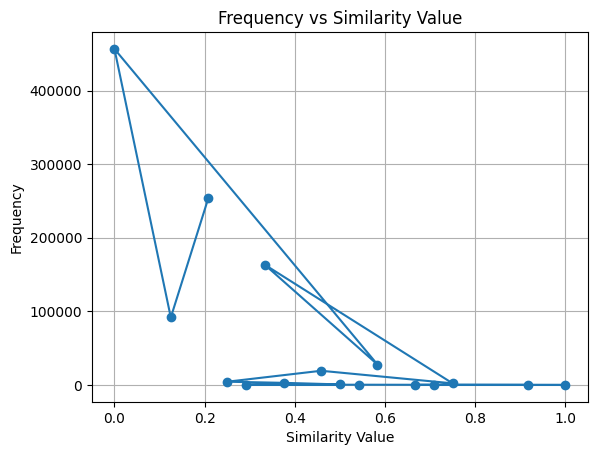

In [22]:
import matplotlib.pyplot as plt

# Extract similarity values
similarity_values = list(normalized_similarity_dict.values())

# Count the frequency of each similarity value
frequency_dict = {}
for val in similarity_values:
    frequency_dict[val] = frequency_dict.get(val, 0) + 1

# Extract frequency and similarity values
frequency = list(frequency_dict.values())
similarity = list(frequency_dict.keys())

# Plot the frequency versus similarity value
plt.plot(similarity, frequency, marker='o', linestyle='-')
plt.title("Frequency vs Similarity Value")
plt.xlabel("Similarity Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [23]:
# Extract unique similarity values
unique_similarity_values = set(normalized_similarity_dict.values())

# Print the unique similarity values
print("Unique Similarity Values:", unique_similarity_values)


Unique Similarity Values: {0.20833333333333334, 0.125, 0.33333333333333337, 0.5833333333333334, 0.0, 0.75, 0.45833333333333337, 0.25, 0.375, 0.5, 1.0, 0.9166666666666666, 0.2916666666666667, 0.5416666666666667, 0.6666666666666667, 0.7083333333333334}


In [24]:
# Extract unique similarity values
unique_similarity_values = set(similarity_dict.values())

# Print the unique similarity values
print("Unique Similarity Values:", unique_similarity_values)

Unique Similarity Values: {0.125, 0.0, 0.2, 0.075, 0.35000000000000003, 0.45, 0.275, 0.15, 0.22499999999999998, 0.3, 0.4, 0.5499999999999999, 0.175, 0.425, 0.325, 0.6}


In [25]:
import json

# Convert keys of similarity_dict to strings
str_similarity_dict = {str(key): value for key, value in normalized_similarity_dict.items()}

output_file = "normalized_similarity_dict.json"

# Save similarity dictionary to output file
with open(output_file, "w") as f:
    json.dump(str_similarity_dict, f)

print(f"Similarity dictionary saved to {output_file}")


Similarity dictionary saved to normalized_similarity_dict.json
